# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [51]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [52]:
df_pred = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/results/vector/part_1_Treatment_training_21_run3/result-lstm-tcp21-hl2-seq2-do0.2-oov4000-part_5_Treatment_testing_21.csv', 
                      names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])

df_truth = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/texts_retraining/texts_retraining_21/part_5_ground_truth.csv', 
                       encoding='ISO-8859-1')


In [53]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,192.168.10.19-59063-192.168.10.50-21-tcp,0.367816,0,0,0,5244.847059,0,0,0
1,192.168.10.15-53283-192.168.10.50-21-tcp,0.356322,0,0,0,4858.082353,0,0,0
2,192.168.10.5-56862-192.168.10.50-21-tcp,0.367816,0,0,0,5051.129412,0,0,0
3,192.168.10.14-59015-192.168.10.50-21-tcp,0.356322,0,0,0,5567.882353,0,0,0
4,192.168.10.19-58060-192.168.10.50-21-tcp,0.367816,0,0,0,7083.800000,0,0,0


In [54]:
df_truth.head()

,ID,Label
0,192.168.10.19-59063-192.168.10.50-21-tcp,BENIGN
1,192.168.10.15-53283-192.168.10.50-21-tcp,BENIGN
2,192.168.10.5-56862-192.168.10.50-21-tcp,BENIGN
3,192.168.10.14-59015-192.168.10.50-21-tcp,BENIGN
4,192.168.10.19-58060-192.168.10.50-21-tcp,BENIGN


In [55]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        562
1         75
Name: count, dtype: int64

## Exploratory Data Analysis

In [56]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        562
1         75
Name: count, dtype: int64

In [57]:
df_pred[['b_zscore']].value_counts()

b_zscore
0           624
1            13
Name: count, dtype: int64

In [58]:
df_truth.isnull().sum()

ID       0
Label    0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [59]:
df_truth['Label'].head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name: Label, dtype: object

## Making Predictions

In [60]:
df_pred["id"]

0      192.168.10.19-59063-192.168.10.50-21-tcp
1      192.168.10.15-53283-192.168.10.50-21-tcp
2       192.168.10.5-56862-192.168.10.50-21-tcp
3      192.168.10.14-59015-192.168.10.50-21-tcp
4      192.168.10.19-58060-192.168.10.50-21-tcp
                         ...                   
632    192.168.10.16-47672-192.168.10.50-21-tcp
633    192.168.10.16-54174-192.168.10.50-21-tcp
634      192.168.10.9-2314-192.168.10.50-21-tcp
635    192.168.10.14-59458-192.168.10.50-21-tcp
636    192.168.10.17-48436-192.168.10.50-21-tcp
Name: id, Length: 637, dtype: object

In [61]:
df_truth["ID"]

# df_truth[df_truth["id"] == "192.168.10.50-21-172.16.0.1-52120-tcp"]

0      192.168.10.19-59063-192.168.10.50-21-tcp
1      192.168.10.15-53283-192.168.10.50-21-tcp
2       192.168.10.5-56862-192.168.10.50-21-tcp
3      192.168.10.14-59015-192.168.10.50-21-tcp
4      192.168.10.19-58060-192.168.10.50-21-tcp
                         ...                   
632    192.168.10.16-47672-192.168.10.50-21-tcp
633    192.168.10.16-54174-192.168.10.50-21-tcp
634      192.168.10.9-2314-192.168.10.50-21-tcp
635    192.168.10.14-59458-192.168.10.50-21-tcp
636    192.168.10.17-48436-192.168.10.50-21-tcp
Name: ID, Length: 637, dtype: object

In [62]:
# Convert 'Label' column to numeric: BENIGN -> 0, other -> 1
df_truth['Label'] = df_truth['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [63]:
# df_pred["Label"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

# Rename 'ID' to 'id' in df_truth
df_truth = df_truth.rename(columns={'ID': 'id'})

# Now merge and drop rows where the label is missing
df_pred = df_pred.merge(df_truth[['id', 'Label']], on='id', how='left')
df_pred = df_pred.dropna(subset=['Label'])


In [64]:
df_pred[df_pred['Label']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
85,172.16.0.1-60106-192.168.10.50-21-tcp,0.428571,0,0,0,11717.545455,0,0,0,1
86,172.16.0.1-53110-192.168.10.50-21-tcp,0.405405,0,0,0,3419.457143,0,0,0,1
87,172.16.0.1-58916-192.168.10.50-21-tcp,0.310345,0,0,0,3658.185185,0,0,0,1
88,172.16.0.1-56550-192.168.10.50-21-tcp,0.487500,1,1,0,216385.141026,1,1,1,1
89,172.16.0.1-52506-192.168.10.50-21-tcp,0.297297,0,0,0,82397.914286,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
576,172.16.0.1-52776-192.168.10.50-21-tcp,0.393939,0,0,0,293823.580645,1,1,1,1
577,172.16.0.1-58102-192.168.10.50-21-tcp,0.393939,0,0,0,25664.096774,0,0,0,1
578,172.16.0.1-56196-192.168.10.50-21-tcp,0.461538,1,1,0,13383.702703,0,0,0,1
579,172.16.0.1-53006-192.168.10.50-21-tcp,0.375000,0,0,0,3376.666667,0,0,0,1


In [65]:
df_pred[df_pred['Label']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.19-59063-192.168.10.50-21-tcp,0.367816,0,0,0,5244.847059,0,0,0,0
1,192.168.10.15-53283-192.168.10.50-21-tcp,0.356322,0,0,0,4858.082353,0,0,0,0
2,192.168.10.5-56862-192.168.10.50-21-tcp,0.367816,0,0,0,5051.129412,0,0,0,0
3,192.168.10.14-59015-192.168.10.50-21-tcp,0.356322,0,0,0,5567.882353,0,0,0,0
4,192.168.10.19-58060-192.168.10.50-21-tcp,0.367816,0,0,0,7083.800000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
644,192.168.10.16-47672-192.168.10.50-21-tcp,0.344828,0,0,0,11322.047059,0,0,0,0
645,192.168.10.16-54174-192.168.10.50-21-tcp,0.344828,0,0,0,6142.211765,0,0,0,0
646,192.168.10.9-2314-192.168.10.50-21-tcp,0.390805,0,0,0,4532.317647,0,0,0,0
647,192.168.10.14-59458-192.168.10.50-21-tcp,0.367816,0,0,0,5636.670588,0,0,0,0


In [66]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.19-59063-192.168.10.50-21-tcp,0.367816,0,0,0,5244.847059,0,0,0,0
1,192.168.10.15-53283-192.168.10.50-21-tcp,0.356322,0,0,0,4858.082353,0,0,0,0
2,192.168.10.5-56862-192.168.10.50-21-tcp,0.367816,0,0,0,5051.129412,0,0,0,0
3,192.168.10.14-59015-192.168.10.50-21-tcp,0.356322,0,0,0,5567.882353,0,0,0,0
4,192.168.10.19-58060-192.168.10.50-21-tcp,0.367816,0,0,0,7083.800000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
644,192.168.10.16-47672-192.168.10.50-21-tcp,0.344828,0,0,0,11322.047059,0,0,0,0
645,192.168.10.16-54174-192.168.10.50-21-tcp,0.344828,0,0,0,6142.211765,0,0,0,0
646,192.168.10.9-2314-192.168.10.50-21-tcp,0.390805,0,0,0,4532.317647,0,0,0,0
647,192.168.10.14-59458-192.168.10.50-21-tcp,0.367816,0,0,0,5636.670588,0,0,0,0


In [67]:
df_pred[['Label']].value_counts()

Label
1        496
0        153
Name: count, dtype: int64

In [68]:
import os
# Define the directory path
dir_path = '../mcnemar/ftp'

# Check if the directory exists, and if not, create it
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv(os.path.join(dir_path, 'pred_0.0.csv'))

## Calculating Score

In [69]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [70]:
df_pred[['b_zscore']]

,b_zscore
0,0
1,0
2,0
3,0
4,0
...,...
644,0
645,0
646,0
647,0


### Detection Rate

In [71]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.17338709677419356
Recall-Binary-b_iqr: 0.15120967741935484
Recall-Binary-b_zscore: 0.02620967741935484
Recall-Floating-f_mean: 0.11693548387096774
Recall-Floating-f_iqr: 0.28830645161290325
Recall-Floating-f_zscore: 0.4213709677419355


### Confussion Matrix

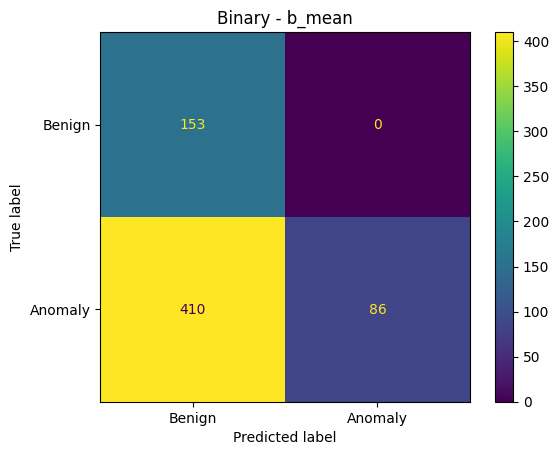

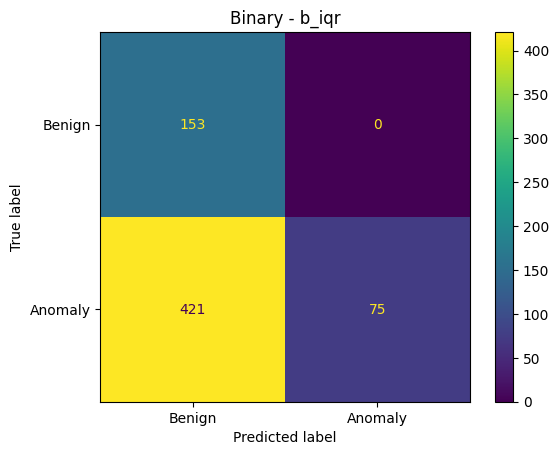

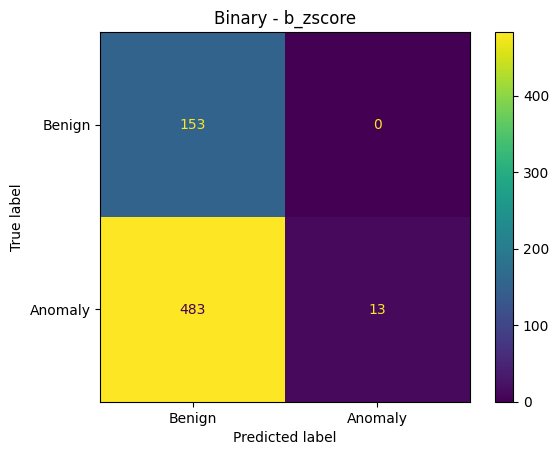

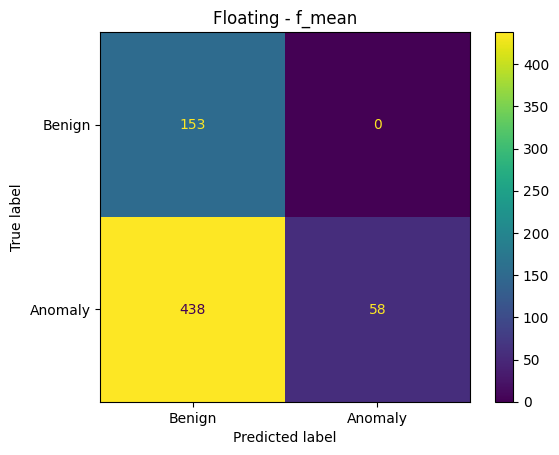

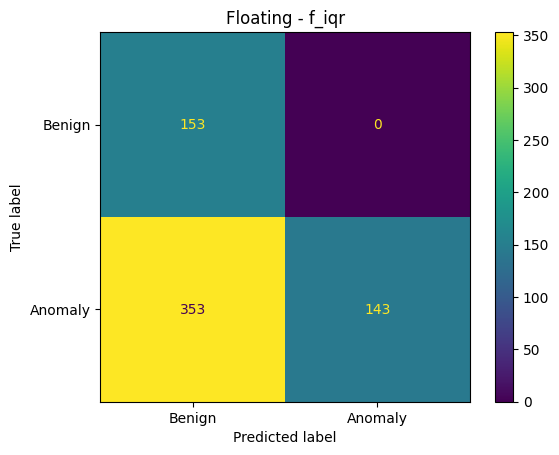

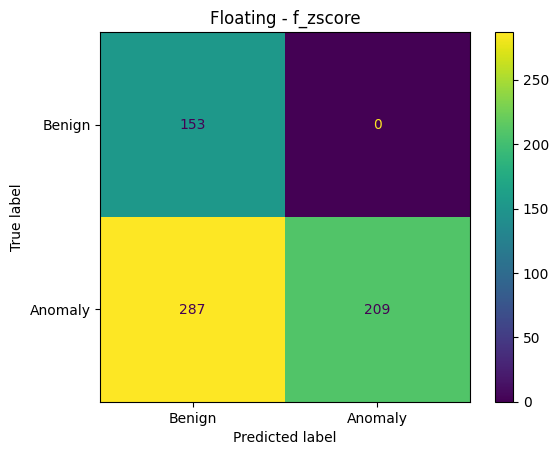

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [73]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.20772946859903382
F2-Binary-b_iqr: 0.1821272462360369
F2-Binary-b_zscore: 0.03254882323485228
F2-Floating-f_mean: 0.14201762977473065
F2-Floating-f_iqr: 0.33615420780441935
F2-Floating-f_zscore: 0.47651618787049704


### FPR Score

In [74]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.0
FPR-Binary-b_iqr: 0.0
FPR-Binary-b_zscore: 0.0
FPR-Floating-f_mean: 0.0
FPR-Floating-f_iqr: 0.0
FPR-Floating-f_zscore: 0.0


In [75]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.3682588597842835
Accuracy-Binary-b_iqr: 0.35130970724191063
Accuracy-Binary-b_zscore: 0.25577812018489987
Accuracy-Floating-f_mean: 0.325115562403698
Accuracy-Floating-f_iqr: 0.4560862865947612
Accuracy-Floating-f_zscore: 0.5577812018489985


In [76]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,F2 Score,FPR Score,Accuracy Score
b_mean,0.173387,0.207729,0.0,0.368259
b_iqr,0.151210,0.182127,0.0,0.351310
b_zscore,0.026210,0.032549,0.0,0.255778
f_mean,0.116935,0.142018,0.0,0.325116
f_iqr,0.288306,0.336154,0.0,0.456086
f_zscore,0.421371,0.476516,0.0,0.557781


In [77]:
df_score.to_excel('score_ftp_0.0.xlsx')

In [78]:
# %pip install openpyxl